# ToDo List!
* ¿Por qué normalizamos usando z-score? ¿Cuándo normalizamos? ¿Sólo variables continuas o discretas también?
* ¿Qué suposición hace el MAE? ¿Qué está minimizando? ¿Por qué conviene usarlo como función de costo en este caso?
* Usar otros optimizadores
* Probar con Early Stopping
* Probar con Model Checkpoint
* Probar con Scheduling Learning Rate
* Utilizar curvas de aprendizaje en Tensorboard
* Empezar con MSE y luego con MAE

# Fuentes

### Link: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0
En esta fuente se puede encontrar una breve explicación del MAE y del MSE, una comparación entre ambos respecto de su comportamiento en entrenamiento frente a conjuntos de datos con y sin outliers, y luego una comparación de su comportamiento durante entrenamiento a razón de cómo son sus gradientes, lo cual provoca en el caso del MAE que la convergencia sea más lenta y sea necesario utilizar un **learning rate dinámico**. Explica que, si nos importa que la presencia de outliers tenga un impacto directo sobre el modelo, deberíamos utilizar MSE, mientras que si deseamos que no afecte demasiado podemos emplear MAE.

### Link: https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
En esta fuente se puede encontrar una explicación de los tres métodos para learning rate dinámico utilizados, el **time-based decay**, el **step decay** y el **exponential decay**, empleando para algunos de ellos la clase de Keras llamada Learning Rate Scheduler, que permite modificar a gusto del usuario el valor del learning rate a través del proceso.

### Link: https://stackoverflow.com/questions/46308374/what-is-validation-data-used-for-in-a-keras-sequential-model
Esta disución de StackOverflow es interesante sobre la separación de los datasets en entrenamiento, validación y evaluación del modelo, la use para verificar algunas cuestiones sobre cómo usaba la información de validación Keras, entre otras cosas.

### Link: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
Explicación sobre el uso de **early stopping**, donde básicamente buscamos parar el entrenamiento aunque no se hayan terminado de correr todos los epochs predefinidos, porque se detecta que no hay mejoría en los resultados obtenidos, para ello se emplea la métrica evaluada sobre el conjunto de validación.

# 1. Cargando base de datos

In [309]:
import pandas as pd

In [310]:
import matplotlib.pyplot as plt

In [311]:
import numpy as np

In [312]:
import importlib

In [313]:
import sys

In [314]:
sys.path.insert(0, '..')

In [315]:
from src import helper
importlib.reload(helper);

In [316]:
# Read the database from the .csv file into a pandas dataframe
df = pd.read_csv('../../databases/insurance.csv')

# 2. Preprocesamiento de los datos

In [317]:
from sklearn import preprocessing

## 2.1. Codificación de variables no numéricas

In [318]:
# Create a label encoder for the sex variable or feature and create a new column in the dataframe 
# with the encoded version of the gender
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(df['sex'])
df['sex-encoded'] = sex_encoder.transform(df['sex'])

In [319]:
# Create a label encoder for the smoker variable or feature and create a new column in the dataframe
# with the encoded version of the smoker
smoker_encoder = preprocessing.LabelEncoder()
smoker_encoder.fit(df['smoker'])
df['smoker-encoded'] = smoker_encoder.transform(df['smoker'])

In [320]:
# Create a one hot encoder and fit the available types of regions in the dataset
region_encoder = preprocessing.OneHotEncoder()
region_encoder.fit(df['region'].to_numpy().reshape(-1, 1))

# Transform all entries into the one hot encoded representation
encoded_regions = region_encoder.transform(df['region'].to_numpy().reshape(-1, 1)).toarray()

# Add each new encoded variable or feature to the dataset
for i, category in enumerate(region_encoder.categories_[0]):
    df[f'{category}-encoded'] = encoded_regions.transpose()[i]

## 2.2. Filtrado o eliminación de variables no necesarias

In [321]:
# Declare the selected variables to be used
x_variables = ['age', 'bmi', 'smoker-encoded']#['age', 'bmi', 'smoker-encoded', 'children', 'sex-encoded', 'northwest-encoded', 'northeast-encoded', 'southwest-encoded', 'southeast-encoded']
y_variables = ['charges']

# Filtering or removing of non desired variables
df_x = df[x_variables]
df_y = df[y_variables]

# 3. Separación del conjunto de entrenamiento y evaluación

In [322]:
from sklearn import model_selection

In [323]:
from sklearn import preprocessing

## 3.1. Separación de los conjuntos

In [324]:
# Split the dataset into train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_x, df_y, test_size=0.2, random_state=3, shuffle=True)

## 3.2. Normalización de variables

In [325]:
x_train

,age,bmi,smoker-encoded
782,51,35.970,0
502,51,23.210,1
147,51,37.730,0
921,62,33.200,0
164,37,29.640,0
...,...,...,...
789,62,29.920,0
256,56,33.630,1
968,21,25.745,0
952,30,28.405,0


In [326]:
# Select the variables where the z-score will be applied
scalable_variables = ['bmi', 'age']#['age', 'bmi', 'smoker-encoded', 'children', 'sex-encoded', 'northwest-encoded', 'northeast-encoded', 'southwest-encoded', 'southeast-encoded']

if scalable_variables:
    # Create an instance of the StandardScaler for each variable
    scaler = preprocessing.StandardScaler()

    # Fit the distribution
    scaler.fit(x_train.loc[:, scalable_variables])

    # Transform and normalize all variables
    x_train.loc[:, scalable_variables] = scaler.transform(x_train.loc[:, scalable_variables])
    x_test.loc[:, scalable_variables] = scaler.transform(x_test.loc[:, scalable_variables])

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [327]:
x_train

,age,bmi,smoker-encoded
782,0.843142,0.860501,0
502,0.843142,-1.244629,1
147,0.843142,1.150864,0
921,1.631808,0.403510,0
164,-0.160614,-0.183815,0
...,...,...,...
789,1.631808,-0.137621,0
256,1.201626,0.474451,1
968,-1.307765,-0.826407,0
952,-0.662493,-0.387564,0


# 4. Regresión Lineal


#### Comentarios
1. Al principio, sucedió que el MAE era muy lento para convergencia, lo cual tiene sentido por el tipo de función de costo que representa. Particularmente, comparado con MSE, es mucho más lentro. Empecé probando modificar de forma estática y a mano el **learning rate**.
2. Luego, con un learning rate cada vez mayor, pude observar que el entrenamiento era más rápido, pero sucedían dos cuestiones. En primer lugar, que se producía una especie oscilación en torno a un valor que asumo que es el mínimo al cual se acerca el entrenamiento, con lo cual sería necesario disminuir cerca de ahí el valor del learning rate. Por otro lado, este mínimo no era el mismo mínimo que obtuve con el MSE, debe ser un plateau, un mínimo local pero no el absoluto. Me propuse usar **learning rate dinámico** y **comenzar de diferentes puntos**.
3. Cuando probe utilizar MSE, si no normalizaba con z-score todas las variables, rápidamente divergía la función de costo y se rompía el entrenamiento. Por otro lado, la misma normalización afectaba mucho al entrenamiento del MAE. *¿Por qué?* Lo pude corregir un poco al aumentar el learning rate por un factor, lo cual debe tener sentido si se considera que ahora las variables estando normalizadas tienen una menor magnitud lo cual puede producir que los pasos sean menores que antes, y por eso se ralentizó.

In [328]:
from tensorflow import keras

In [329]:
from sklearn import metrics

In [330]:
import datetime

In [331]:
from src import learningrate
importlib.reload(learningrate);

## 4.1 Prueba #1
Esta es la prueba conceptual #1 para ganar intuición con el uso de los métodos, herramientas, entre otros aspectos.
* Modelo: **Regresión Lineal**
* Optimizador: **Stochastic Gradient Descent**
* Función de costo: **Mean Absolute Error**
* Learning Rate: **Time-based decay**

In [332]:
# Create the sequential stack of dense layers as a model
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(df_x.shape[1],)))

# Compiling the model with Keras
model.compile(
    optimizer=keras.optimizers.SGD(lr=1000, momentum=0.8, decay=0.01, nesterov=True), 
    loss=keras.losses.MAE
)

# Create the callback for the TensorBoard
tb_callback = keras.callbacks.TensorBoard(
    log_dir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), 
    update_freq=1, 
    histogram_freq=1
)

# Create the callback for the EarlyStopping
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=30,
    min_delta=5,
    verbose=1
)

# Create the callback for the ModelCheckpoint
mc_callback = keras.callbacks.ModelCheckpoint('linear_regression_time_based_decay.h5')

# Training the model
history = model.fit(
    x_train, y_train, validation_split=0.2, epochs=100, batch_size=64, 
    verbose=2, shuffle=True, 
    callbacks=[
        tb_callback,
        es_callback,
        mc_callback
    ]
)

Epoch 1/100
14/14 - 2s - loss: 7774.5840 - val_loss: 3709.6099
Epoch 2/100
14/14 - 0s - loss: 4074.5789 - val_loss: 3176.3425
Epoch 3/100
14/14 - 0s - loss: 3925.3840 - val_loss: 3178.5188
Epoch 4/100
14/14 - 0s - loss: 3910.2881 - val_loss: 3177.3408
Epoch 5/100
14/14 - 0s - loss: 3888.2258 - val_loss: 3279.5032
Epoch 6/100
14/14 - 0s - loss: 3865.8149 - val_loss: 3166.5166
Epoch 7/100
14/14 - 0s - loss: 3853.3149 - val_loss: 3122.8210
Epoch 8/100
14/14 - 0s - loss: 3818.9990 - val_loss: 3098.0557
Epoch 9/100
14/14 - 0s - loss: 3782.2258 - val_loss: 3143.6018
Epoch 10/100
14/14 - 0s - loss: 3779.8643 - val_loss: 3169.7197
Epoch 11/100
14/14 - 0s - loss: 3766.8870 - val_loss: 3101.3174
Epoch 12/100
14/14 - 0s - loss: 3737.6650 - val_loss: 3135.7009
Epoch 13/100
14/14 - 0s - loss: 3717.5237 - val_loss: 3159.0134
Epoch 14/100
14/14 - 0s - loss: 3709.7412 - val_loss: 3114.3784
Epoch 15/100
14/14 - 0s - loss: 3698.3428 - val_loss: 3117.4087
Epoch 16/100
14/14 - 0s - loss: 3687.8560 - val_l

In [333]:
# Predict using the test data
y_pred = model.predict(x_test)

# Compute the metric for the resulting model
mae = metrics.mean_absolute_error(y_test, y_pred)
                                  
print(f'MAE: {mae}')

MAE: 3611.143099054396


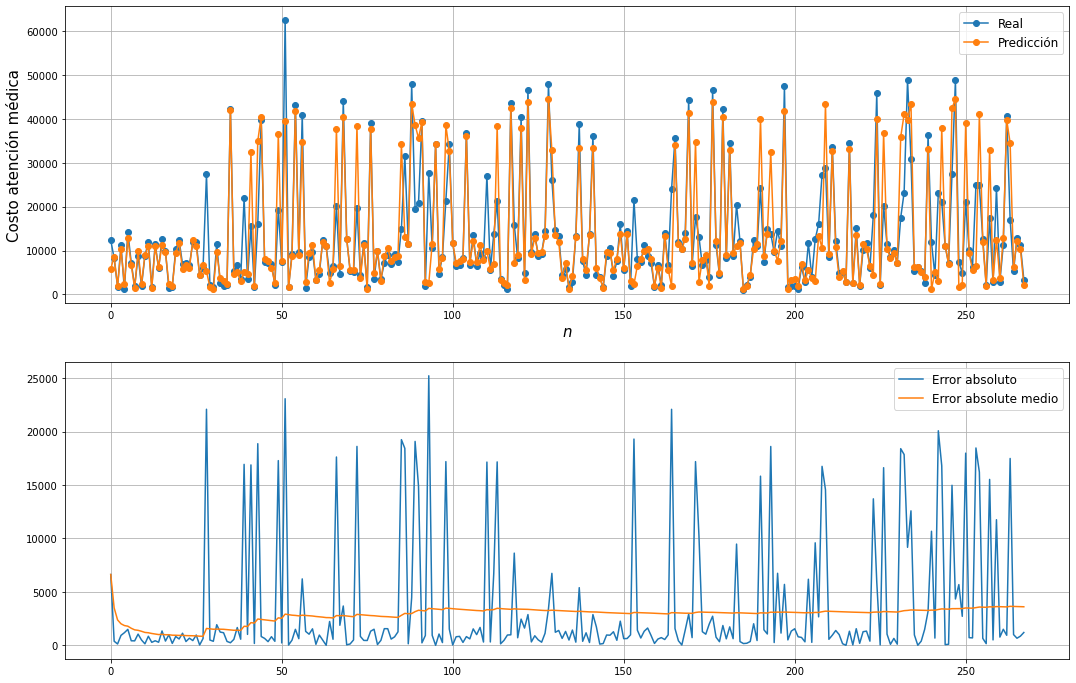

In [334]:
helper.plot_linear_regression_result(
    y_test.to_numpy(), 
    y_pred, 
    result_label='Costo atención médica'
)

## 4.2 Prueba #2
Esta es la prueba conceptual #2 para ganar intuición con el uso de los métodos, herramientas, entre otros aspectos.
* Modelo: **Regresión Lineal**
* Optimizador: **Stochastic Gradient Descent**
* Función de costo: **Mean Absolute Error**
* Learning Rate: **Step decay**

In [335]:
# Create the sequential stack of dense layers as a model
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(df_x.shape[1],)))

# Compiling the model with Keras
model.compile(
    optimizer=keras.optimizers.SGD(), 
    loss=keras.losses.MAE
)

# Creating the Learning Rate Scheduler
lr_callback = keras.callbacks.LearningRateScheduler(learningrate.StepDecay(1000, 0.9, 10))

# Create the callback for the TensorBoard
tb_callback = keras.callbacks.TensorBoard(
    log_dir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), 
    update_freq=1, 
    histogram_freq=1
)

# Create the callback for the EarlyStopping
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=30,
    min_delta=5,
    verbose=1
)

# Create the callback for the ModelCheckpoint
mc_callback = keras.callbacks.ModelCheckpoint('linear_regression_step_decay.h5')

# Training the model
history = model.fit(
    x_train, y_train, validation_split=0.2, epochs=100, batch_size=64, 
    verbose=2, shuffle=True, 
    callbacks=[
        tb_callback, 
        es_callback,
        lr_callback,
        mc_callback
    ]
)

Epoch 1/100
14/14 - 1s - loss: 9090.8086 - val_loss: 4940.4224
Epoch 2/100
14/14 - 0s - loss: 6066.5977 - val_loss: 4476.7729
Epoch 3/100
14/14 - 0s - loss: 5439.2705 - val_loss: 4094.2139
Epoch 4/100
14/14 - 0s - loss: 4814.4297 - val_loss: 3559.0273
Epoch 5/100
14/14 - 0s - loss: 4306.0308 - val_loss: 3263.2371
Epoch 6/100
14/14 - 0s - loss: 4094.6262 - val_loss: 3156.3984
Epoch 7/100
14/14 - 0s - loss: 4025.1946 - val_loss: 3163.4392
Epoch 8/100
14/14 - 0s - loss: 3998.6743 - val_loss: 3158.6934
Epoch 9/100
14/14 - 0s - loss: 3970.6082 - val_loss: 3207.7473
Epoch 10/100
14/14 - 0s - loss: 3971.8911 - val_loss: 3162.7979
Epoch 11/100
14/14 - 0s - loss: 3948.0862 - val_loss: 3155.6074
Epoch 12/100
14/14 - 0s - loss: 3936.0315 - val_loss: 3158.4924
Epoch 13/100
14/14 - 0s - loss: 3938.4880 - val_loss: 3143.1409
Epoch 14/100
14/14 - 0s - loss: 3946.6492 - val_loss: 3122.9480
Epoch 15/100
14/14 - 0s - loss: 3922.0791 - val_loss: 3178.2869
Epoch 16/100
14/14 - 0s - loss: 3919.9773 - val_l

In [336]:
# Predict using the test data
y_pred = model.predict(x_test)

# Compute the metric for the resulting model
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae}')

MAE: 3609.6680603227614


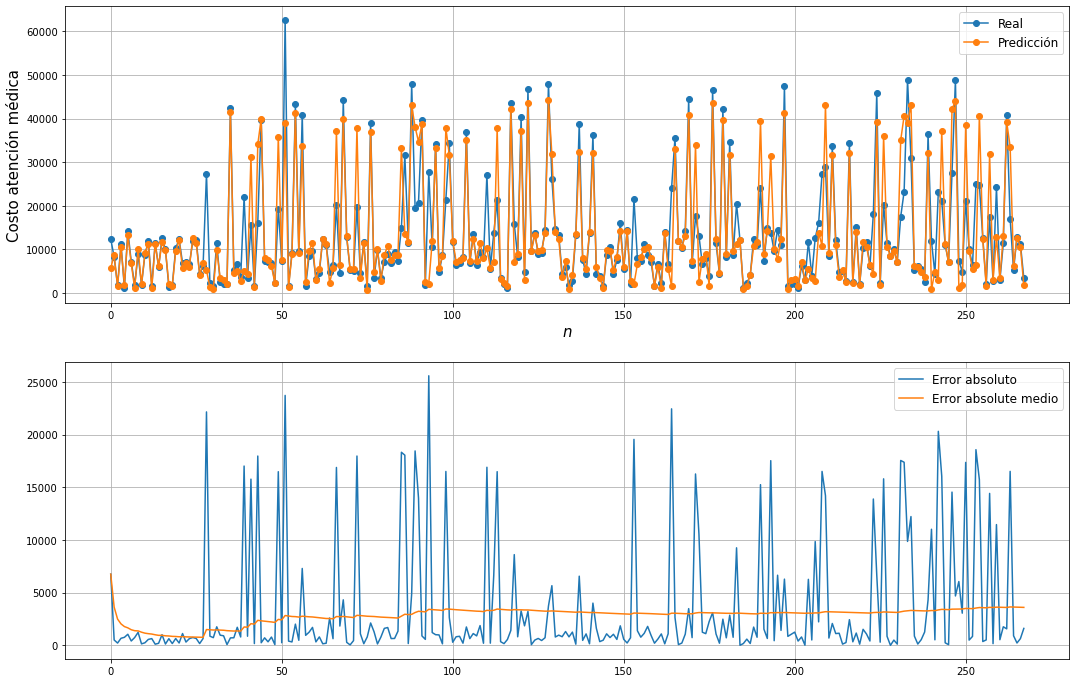

In [337]:
helper.plot_linear_regression_result(
    y_test.to_numpy(), 
    y_pred, 
    result_label='Costo atención médica'
)

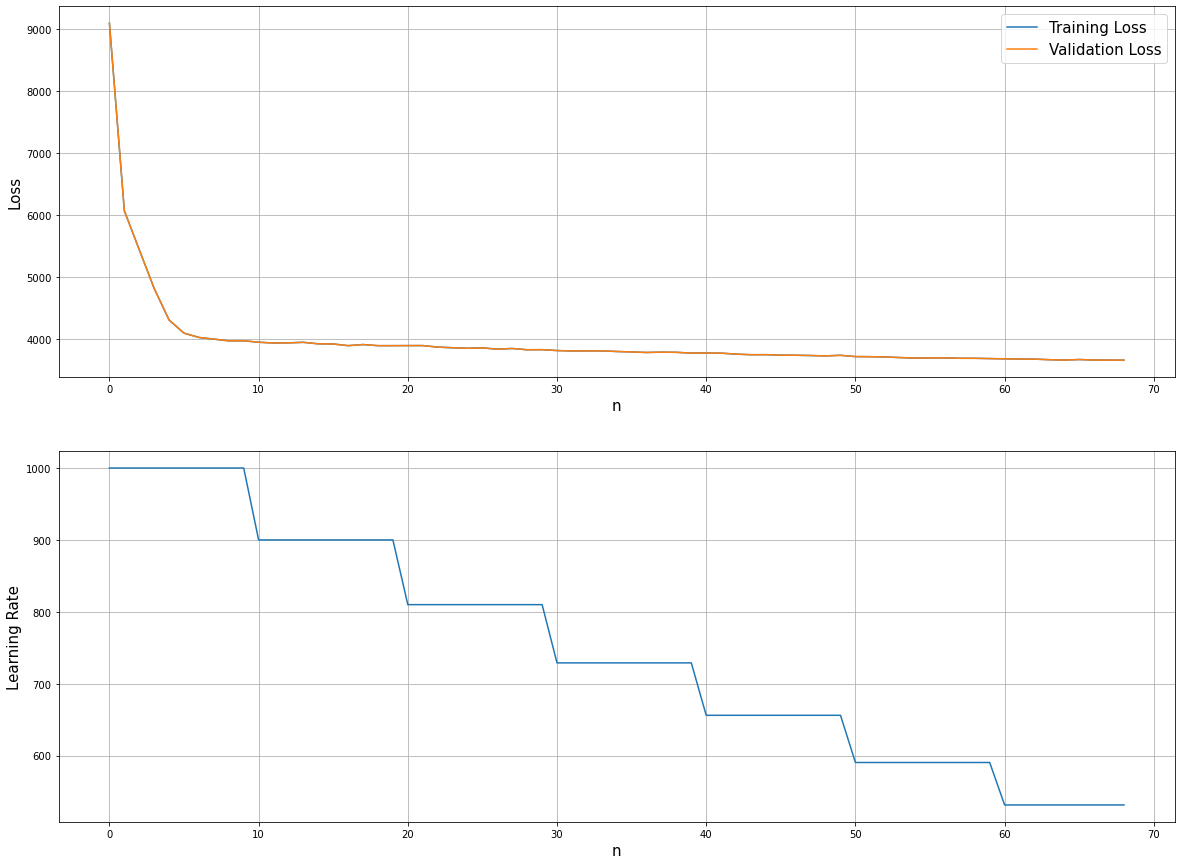

In [338]:
helper.plot_linear_regression_history(history)

## 4.3 Prueba #3
Esta es la prueba conceptual #2 para ganar intuición con el uso de los métodos, herramientas, entre otros aspectos.
* Modelo: **Regresión Lineal**
* Optimizador: **Stochastic Gradient Descent**
* Función de costo: **Mean Absolute Error**
* Learning Rate: **Exponential decay**

In [339]:
# Create the sequential stack of dense layers as a model
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(df_x.shape[1],)))

# Compiling the model with Keras
model.compile(
    optimizer=keras.optimizers.SGD(), 
    loss=keras.losses.MAE
)

# Creating the Learning Rate Scheduler
lr_callback = keras.callbacks.LearningRateScheduler(learningrate.ExponentialDecay(1000, 0.005))

# Create the callback for the TensorBoard
tb_callback = keras.callbacks.TensorBoard(
    log_dir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), 
    update_freq=1, 
    histogram_freq=1
)

# Create the callback for the EarlyStopping
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=30,
    min_delta=5,
    verbose=1
)

# Create the callback for the ModelCheckpoint
mc_callback = keras.callbacks.ModelCheckpoint('linear_regression_exponential_decay.h5')

# Training the model
history = model.fit(
    x_train, y_train, validation_split=0.2, epochs=100, batch_size=64, 
    verbose=2, shuffle=True, 
    callbacks=[
        tb_callback,
        es_callback,
        lr_callback,
        mc_callback
    ]
)

Epoch 1/100
14/14 - 1s - loss: 9027.8643 - val_loss: 4908.7144
Epoch 2/100
14/14 - 0s - loss: 6058.7178 - val_loss: 4456.8765
Epoch 3/100
14/14 - 0s - loss: 5402.1797 - val_loss: 3992.5422
Epoch 4/100
14/14 - 0s - loss: 4801.8535 - val_loss: 3550.7461
Epoch 5/100
14/14 - 0s - loss: 4309.8516 - val_loss: 3269.9500
Epoch 6/100
14/14 - 0s - loss: 4092.4111 - val_loss: 3174.6577
Epoch 7/100
14/14 - 0s - loss: 4026.0103 - val_loss: 3134.1572
Epoch 8/100
14/14 - 0s - loss: 3985.5911 - val_loss: 3158.9658
Epoch 9/100
14/14 - 0s - loss: 3980.1384 - val_loss: 3138.5784
Epoch 10/100
14/14 - 0s - loss: 3949.2942 - val_loss: 3160.4707
Epoch 11/100
14/14 - 0s - loss: 3949.9673 - val_loss: 3141.7341
Epoch 12/100
14/14 - 0s - loss: 3951.8784 - val_loss: 3134.7639
Epoch 13/100
14/14 - 0s - loss: 3936.6223 - val_loss: 3148.6755
Epoch 14/100
14/14 - 0s - loss: 3926.2480 - val_loss: 3197.0911
Epoch 15/100
14/14 - 0s - loss: 3916.9756 - val_loss: 3141.9766
Epoch 16/100
14/14 - 0s - loss: 3922.3508 - val_l

In [340]:
# Predict using the test data
y_pred = model.predict(x_test)

# Compute the metric for the resulting model
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae}')

MAE: 3659.5173320082786


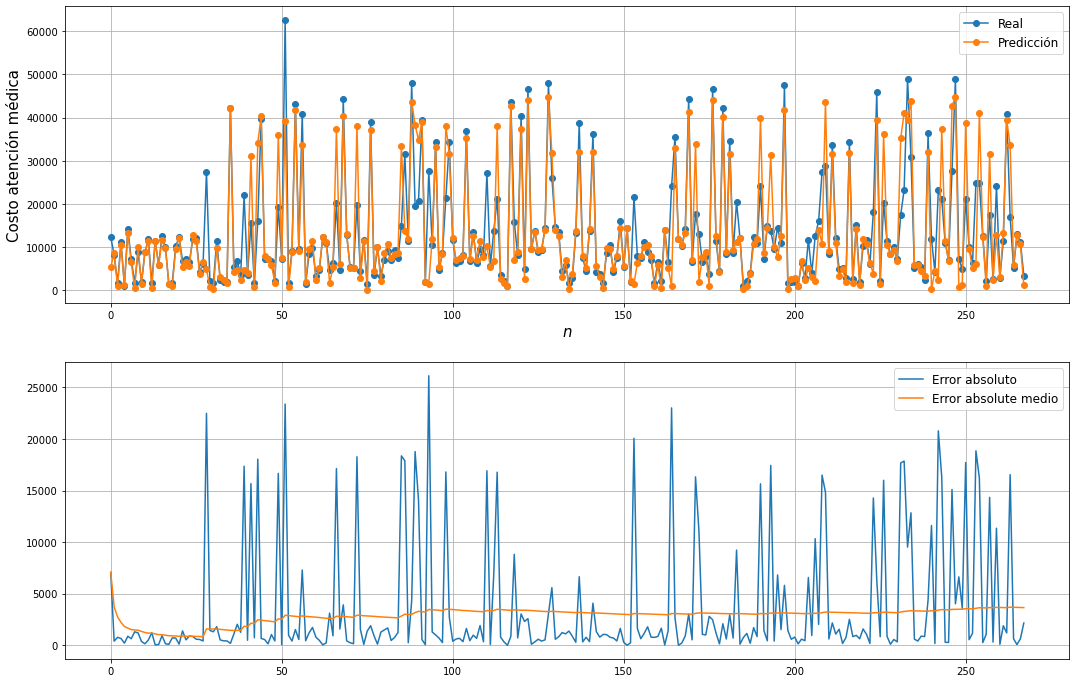

In [341]:
helper.plot_linear_regression_result(
    y_test.to_numpy(), 
    y_pred, 
    result_label='Costo atención médica'
)

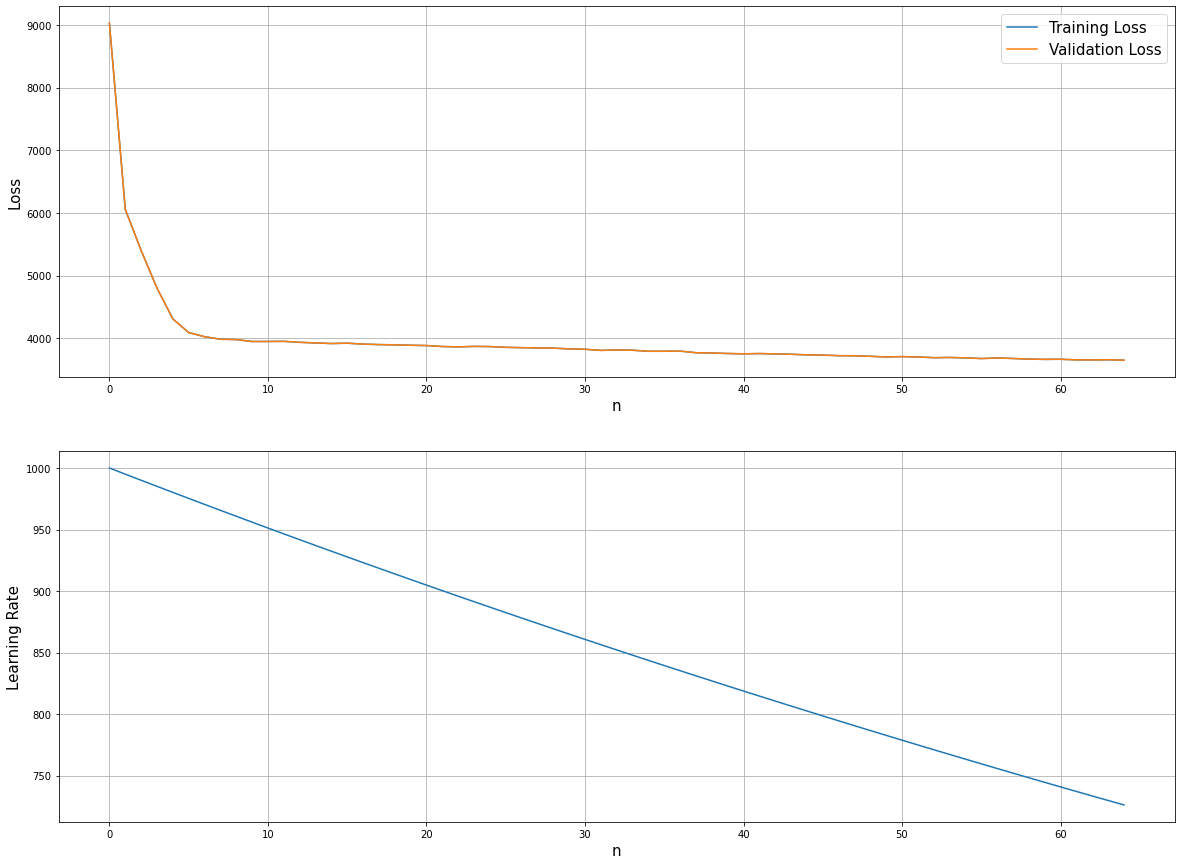

In [342]:
helper.plot_linear_regression_history(history)